In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/home_insurance.csv")

In [ ]:
df.shape

(256136, 66)

In [ ]:
df.head()

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,...,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,...,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,...,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,...,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,...,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,...,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256136 entries, 0 to 256135
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   QUOTE_DATE              129524 non-null  object 
 1   COVER_START             189021 non-null  object 
 2   CLAIM3YEARS             190039 non-null  object 
 3   P1_EMP_STATUS           189021 non-null  object 
 4   P1_PT_EMP_STATUS        1782 non-null    object 
 5   BUS_USE                 189021 non-null  object 
 6   CLERICAL                2944 non-null    object 
 7   AD_BUILDINGS            189021 non-null  object 
 8   RISK_RATED_AREA_B       140876 non-null  float64
 9   SUM_INSURED_BUILDINGS   189021 non-null  float64
 10  NCD_GRANTED_YEARS_B     189021 non-null  float64
 11  AD_CONTENTS             189021 non-null  object 
 12  RISK_RATED_AREA_C       180290 non-null  float64
 13  SUM_INSURED_CONTENTS    189021 non-null  float64
 14  NCD_GRANTED_YEARS_C 

In [ ]:
df.isnull().sum()

,0
QUOTE_DATE,126612
COVER_START,67115
CLAIM3YEARS,66097
P1_EMP_STATUS,67115
P1_PT_EMP_STATUS,254354
...,...
MTA_DATE,229561
LAST_ANN_PREM_GROSS,66097
POL_STATUS,67115
i,0


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(256136, 66)

In [ ]:
df.drop(['i','Police',],axis=1,inplace=True)

In [ ]:
null_col={}
for i in zip(df.columns,df.isnull().sum() / df.shape[0] * 100):
    print(i)
    if i[1]>70:
      null_col[i[0]]=i[1]

('QUOTE_DATE', 49.431551988006376)
('COVER_START', 26.202876596807943)
('CLAIM3YEARS', 25.80543148952119)
('P1_EMP_STATUS', 26.202876596807943)
('P1_PT_EMP_STATUS', 99.30427585345285)
('BUS_USE', 26.202876596807943)
('CLERICAL', 98.85061061311178)
('AD_BUILDINGS', 26.202876596807943)
('RISK_RATED_AREA_B', 44.999531498891216)
('SUM_INSURED_BUILDINGS', 26.202876596807943)
('NCD_GRANTED_YEARS_B', 26.202876596807943)
('AD_CONTENTS', 26.202876596807943)
('RISK_RATED_AREA_C', 29.611612580816445)
('SUM_INSURED_CONTENTS', 26.202876596807943)
('NCD_GRANTED_YEARS_C', 26.202876596807943)
('CONTENTS_COVER', 26.202876596807943)
('BUILDINGS_COVER', 26.202876596807943)
('SPEC_SUM_INSURED', 26.202876596807943)
('SPEC_ITEM_PREM', 26.202876596807943)
('UNSPEC_HRP_PREM', 26.202876596807943)
('P1_DOB', 26.202876596807943)
('P1_MAR_STATUS', 26.202876596807943)
('P1_POLICY_REFUSED', 26.202876596807943)
('P1_SEX', 26.202876596807943)
('APPR_ALARM', 26.202876596807943)
('APPR_LOCKS', 26.202876596807943)
('BED

In [ ]:
print(null_col)

{'P1_PT_EMP_STATUS': 99.30427585345285, 'CLERICAL': 98.85061061311178, 'CAMPAIGN_DESC': 100.0, 'MTA_FAP': 78.24593184870537, 'MTA_APRP': 78.24593184870537, 'MTA_DATE': 89.62465252834431}


In [ ]:
df.drop(null_col.keys(),axis=1,inplace=True)

In [ ]:
df.shape

(256136, 58)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256136 entries, 0 to 256135
Data columns (total 58 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   QUOTE_DATE              129524 non-null  object 
 1   COVER_START             189021 non-null  object 
 2   CLAIM3YEARS             190039 non-null  object 
 3   P1_EMP_STATUS           189021 non-null  object 
 4   BUS_USE                 189021 non-null  object 
 5   AD_BUILDINGS            189021 non-null  object 
 6   RISK_RATED_AREA_B       140876 non-null  float64
 7   SUM_INSURED_BUILDINGS   189021 non-null  float64
 8   NCD_GRANTED_YEARS_B     189021 non-null  float64
 9   AD_CONTENTS             189021 non-null  object 
 10  RISK_RATED_AREA_C       180290 non-null  float64
 11  SUM_INSURED_CONTENTS    189021 non-null  float64
 12  NCD_GRANTED_YEARS_C     189021 non-null  float64
 13  CONTENTS_COVER          189021 non-null  object 
 14  BUILDINGS_COVER     

In [ ]:
numeric_cols=df.select_dtypes(include='number')

In [ ]:
numeric_cols.shape

(256136, 20)

In [ ]:
df.fillna(numeric_cols.median(),inplace=True)

In [ ]:
cat_cols=df.select_dtypes(exclude='number')

In [ ]:
cat_cols

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,AD_CONTENTS,CONTENTS_COVER,BUILDINGS_COVER,P1_DOB,...,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,POL_STATUS
0,11/22/2007,22/11/2007,N,R,N,Y,Y,Y,Y,15/06/1939,...,N,N,N,N,N,N,N,N,N,Lapsed
1,11/22/2007,01/01/2008,N,E,Y,Y,Y,Y,Y,20/05/1970,...,N,N,N,N,N,N,N,N,Y,Live
2,11/23/2007,23/11/2007,N,E,N,N,Y,N,Y,10/06/1947,...,N,N,N,N,N,N,N,N,Y,Live
3,11/23/2007,12/12/2007,N,R,N,N,Y,N,Y,16/12/1925,...,N,N,N,N,N,N,N,N,N,Live
4,11/22/2007,15/12/2007,N,R,N,Y,Y,Y,Y,11/02/1936,...,N,N,N,N,N,N,N,N,N,Live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256131,NaN,22/02/2005,Y,R,N,Y,Y,Y,Y,15/02/1937,...,N,N,N,N,N,N,N,N,N,Lapsed
256132,NaN,01/12/2000,N,R,N,Y,Y,Y,Y,24/04/1928,...,N,N,N,N,N,N,N,N,Y,Live
256133,NaN,18/01/2006,N,R,N,Y,Y,Y,Y,06/05/1945,...,N,N,N,N,N,N,N,N,N,Live
256134,NaN,31/12/2004,N,R,N,Y,N,Y,N,03/04/1937,...,N,N,N,N,N,N,N,N,N,Lapsed


In [ ]:
for i in cat_cols:
  mode_category = df[i].mode()[0]
  df[i].fillna(mode_category, inplace=True)

In [ ]:
df.isnull().sum()

,0
QUOTE_DATE,0
COVER_START,0
CLAIM3YEARS,0
P1_EMP_STATUS,0
BUS_USE,0
AD_BUILDINGS,0
RISK_RATED_AREA_B,0
SUM_INSURED_BUILDINGS,0
NCD_GRANTED_YEARS_B,0
AD_CONTENTS,0


In [ ]:
df['P1_DOB'] = pd.to_datetime(df['P1_DOB'])

<ipython-input-28-506d5ad66c72>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['P1_DOB'] = pd.to_datetime(df['P1_DOB'])


In [ ]:
df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'])
df['COVER_START']=pd.to_datetime(df['COVER_START'])

<ipython-input-29-2ce7adf5b083>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['COVER_START']=pd.to_datetime(df['COVER_START'])


In [ ]:
cat_cols.drop(['QUOTE_DATE','COVER_START'],axis=1,inplace=True)

In [ ]:
cat_cols.drop('P1_DOB',axis=1,inplace=True)

In [ ]:
df.drop(['QUOTE_DATE','COVER_START'],axis=1,inplace=True)

In [ ]:
from datetime import datetime

def calculate_age(dob):
    today = datetime.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age
df['Age'] = df['P1_DOB'].apply(calculate_age)
df = df.drop(columns=['P1_DOB'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
  df[i]=le.fit_transform(df[i])

In [ ]:
correlations=df.corr()['LAST_ANN_PREM_GROSS']
correlations

,LAST_ANN_PREM_GROSS
CLAIM3YEARS,0.178563
P1_EMP_STATUS,-0.137354
BUS_USE,0.076129
AD_BUILDINGS,0.541488
RISK_RATED_AREA_B,0.158085
SUM_INSURED_BUILDINGS,0.538765
NCD_GRANTED_YEARS_B,0.414555
AD_CONTENTS,0.042648
RISK_RATED_AREA_C,0.077867
SUM_INSURED_CONTENTS,0.060586


In [ ]:
X=df.drop(['LAST_ANN_PREM_GROSS'],axis=1)
y=df['LAST_ANN_PREM_GROSS']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((179295, 55), (76841, 55), (179295,), (76841,))

# Comparing various Models


- Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 2670.0454877902794
Mean Absolute Error: 30.180235494464316
R-squared: 0.6398152532723611


In [ ]:
from sklearn.linear_model import Ridge


ridge_model = Ridge()
ridge_model.fit(X_train, y_train)


y_pred_ridge = ridge_model.predict(X_test)
print("ridge Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("ridge  Mean absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("ridge r^2 error:", r2_score(y_test, y_pred_ridge))

ridge Mean Squared Error: 2670.0632712352362
ridge  Mean absolute Error: 30.18039288164961
ridge r^2 error: 0.6398128543148724


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.06751e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
from sklearn.linear_model import Lasso


lasso_model = Lasso()
lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso  Mean absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso r^2 error:", r2_score(y_test, y_pred_lasso))

Lasso Mean Squared Error: 2755.7078958046604
Lasso  Mean absolute Error: 31.218685996417776
Lasso r^2 error: 0.6282595352608771


- Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
# Train Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=12,criterion='absolute_error',min_samples_split=5,min_samples_leaf=7)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("Decision Tree Mean absolute Error:", mean_absolute_error(y_test, y_pred_tree))
print("Decision Tree r^2 error:", r2_score(y_test, y_pred_tree))


# Get feature importances
importances = tree_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Print sorted feature importances
print("\nFeature Importances in Descending Order:")
print(feature_importances_sorted)

- Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Train the model
boost_model = GradientBoostingRegressor(n_estimators=300,min_samples_split=4,min_samples_leaf=4)
boost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_boost = boost_model.predict(X_test)
print("Gradient Boosting Mean Squared Error:", mean_squared_error(y_test, y_pred_boost))
print("Gradient Boosting Mean absolute Error:", mean_absolute_error(y_test, y_pred_boost))
print("Gradient Boosting r^2 error:", r2_score(y_test, y_pred_boost))

# Feature importance
print("Feature Importances:", boost_model.feature_importances_)
importances = boost_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
# Sort the DataFrame by importance in descending order
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Print sorted feature importances
print("\nFeature Importances in Descending Order:")
print(feature_importances_sorted)

Gradient Boosting Mean Squared Error: 1804.4949548147981
Gradient Boosting Mean absolute Error: 22.290564800200553
Gradient Boosting r^2 error: 0.7565765971990357
Feature Importances: [1.05981818e-02 1.42041514e-03 4.43260450e-05 1.47248087e-01
 4.09725976e-02 1.68949835e-03 6.89354468e-03 6.15658432e-03
 7.18349135e-03 6.94630299e-03 1.78930012e-03 2.29345742e-01
 3.10318086e-03 2.93995537e-03 3.67202331e-02 1.33169041e-01
 5.45482121e-03 0.00000000e+00 2.72163106e-05 2.00030250e-04
 6.21054075e-06 1.91667813e-01 3.74373734e-04 6.86616966e-04
 2.26156373e-04 2.83507425e-04 1.70440799e-02 6.69741498e-06
 1.23125812e-04 1.62116448e-04 1.58898565e-05 1.84930546e-02
 3.46121466e-04 0.00000000e+00 3.03594024e-04 9.84582560e-02
 5.33789309e-03 0.00000000e+00 2.45258453e-04 2.34112941e-05
 8.26302029e-05 1.32045663e-04 2.66815984e-03 1.17125563e-04
 0.00000000e+00 1.65566180e-05 0.00000000e+00 1.79294415e-05
 8.06031319e-06 3.56773657e-05 0.00000000e+00 0.00000000e+00
 1.54918200e-03 8.91052

- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Train the model
forest_model = RandomForestRegressor(n_estimators=500,max_depth=None,min_samples_split=2,min_samples_leaf=2,bootstrap=True)
forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_forest = forest_model.predict(X_test)
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_forest))
print("Random Forest Mean absolute Error:", mean_absolute_error(y_test, y_pred_forest))
print("Random Forest r^2 error:", r2_score(y_test, y_pred_forest))

# Feature importance
print("Feature Importances:", forest_model.feature_importances_)

importances = forest_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
# Sort the DataFrame by importance in descending order
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Print sorted feature importances
print("\nFeature Importances in Descending Order:")
print(feature_importances_sorted)

Random Forest Mean Squared Error: 1847.663897726005
Random Forest Mean absolute Error: 21.681698949741577
Random Forest r^2 error: 0.7507531777703873
Feature Importances: [7.31049720e-03 4.08211982e-03 8.70356416e-04 1.51993556e-01
 4.64299354e-02 1.31737079e-04 1.41331278e-02 3.60919438e-03
 2.86066601e-02 5.37227106e-03 1.11821513e-02 1.56982854e-01
 3.62200992e-03 8.86827053e-03 2.80793260e-02 1.16944218e-01
 1.36747510e-02 1.35844997e-06 4.15010564e-03 2.12360106e-03
 2.74430023e-03 1.66795395e-01 4.98993909e-04 5.56243274e-04
 1.10809303e-03 5.73729443e-04 1.59787799e-02 3.82386956e-03
 1.25954719e-04 3.87501768e-03 2.14235938e-04 2.24136853e-02
 6.00277073e-04 2.10096833e-03 8.14263701e-04 8.17105724e-02
 7.80788630e-03 0.00000000e+00 2.89988007e-03 3.12141569e-03
 3.35569403e-03 1.15746388e-03 4.76084457e-03 1.97293349e-03
 1.14948315e-03 1.03278254e-03 5.30608136e-09 2.80564061e-04
 1.53059097e-05 2.59584547e-03 3.58244125e-08 1.19503149e-04
 4.75756315e-03 6.20492289e-03 4.666

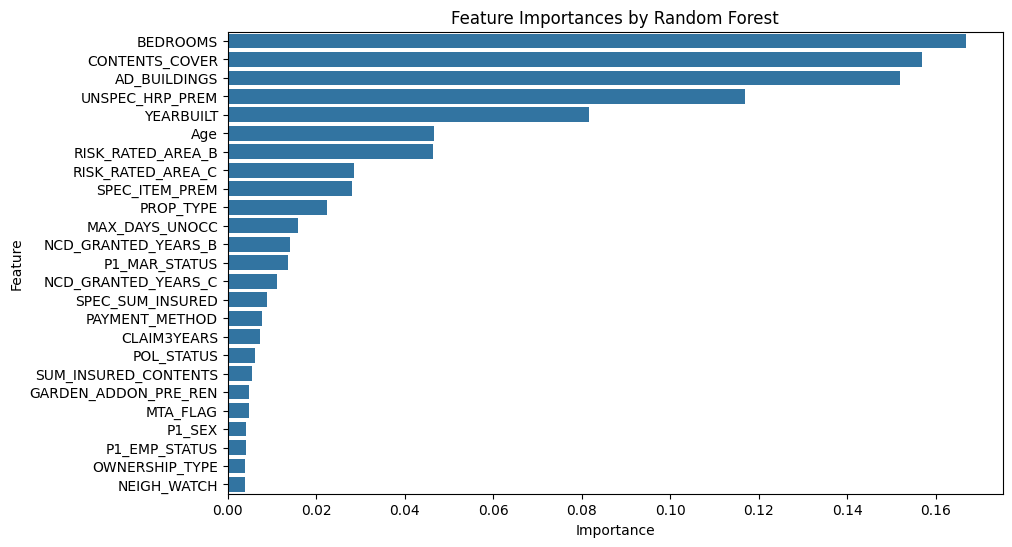

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_sorted[0:25])
plt.title('Feature Importances by Random Forest')
plt.show()

- XGBoost

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2_square: {r2}")

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances.head(25))


Mean Squared Error: 1723.297270854531
Mean Absolute Error: 20.990653268117562
R2_square: 0.7675300312756602
Feature Importances:
                  Feature  Importance
3            AD_BUILDINGS    0.627210
21               BEDROOMS    0.060734
7             AD_CONTENTS    0.051506
15        UNSPEC_HRP_PREM    0.027901
35              YEARBUILT    0.026613
26         MAX_DAYS_UNOCC    0.016449
5   SUM_INSURED_BUILDINGS    0.012293
14         SPEC_ITEM_PREM    0.011686
9    SUM_INSURED_CONTENTS    0.011606
0             CLAIM3YEARS    0.010509
42   GARDEN_ADDON_PRE_REN    0.009993
31              PROP_TYPE    0.009148
43  GARDEN_ADDON_POST_REN    0.008223
6     NCD_GRANTED_YEARS_B    0.006778
4       RISK_RATED_AREA_B    0.006666
16          P1_MAR_STATUS    0.006623
36         PAYMENT_METHOD    0.006343
54                    Age    0.005309
22      ROOF_CONSTRUCTION    0.004604
34             SUBSIDENCE    0.004254
23      WALL_CONSTRUCTION    0.003908
52               MTA_FLAG    0.0039

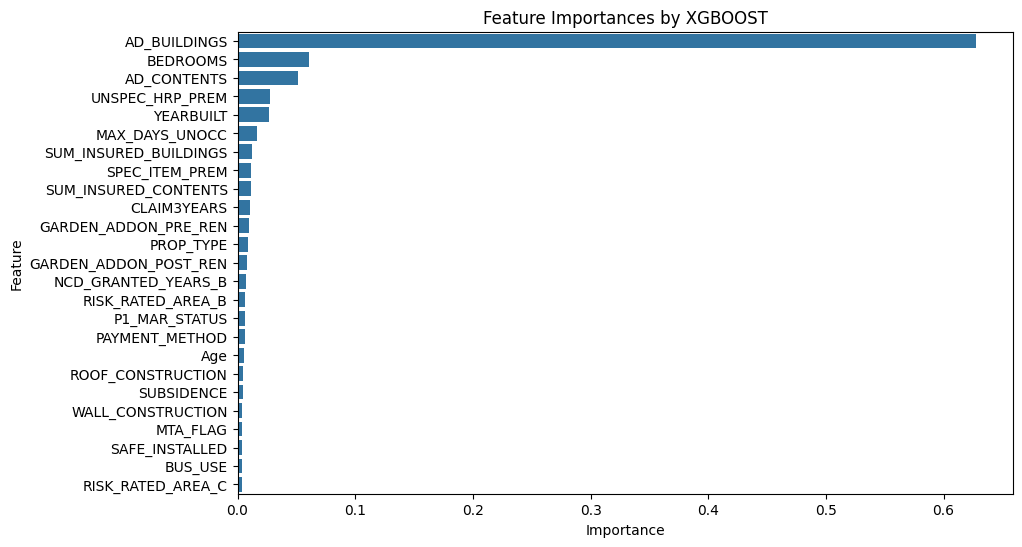

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances[0:25])
plt.title('Feature Importances by XGBOOST')
plt.show()

# Conclusion
By comparing various models we can conclude that XGBoost and random forest are giving the best results.
By referring to the plots features with higher importance can be seen